In [1]:
@time using Integrals

  9.084579 seconds (1.01 M allocations: 69.477 MiB, 0.52% gc time, 2.28% compilation time: 15% of which was recompilation)


In [2]:
@time using Makie

 27.259076 seconds (2.93 M allocations: 186.069 MiB, 0.41% gc time, 0.50% compilation time: 37% of which was recompilation)


In [3]:
@time using CairoMakie

  3.650231 seconds (479.82 k allocations: 29.443 MiB, 0.11% compilation time)


In [43]:
@time using Makie.Colors

  0.000407 seconds (158 allocations: 11.375 KiB)


# Tworzymy strukture Dla halo DM 

In [4]:
struct DM_Halo
    name::String
    Scale_Radius::Float64 #kpc
    Virial_Radius::Float64 #kpc
    Slope::Float64 
    Norm_Mass::Float64 #Sun Mass
    VirialMass::Float64 #SUn mass
    con::Float64 #
    Loc_ρ::Float64 #GeV cm^(-3) !!!!
end

MilkyWay_NFW = DM_Halo("Milky Way NFW profile", 5.26,186.81, 0.0258, 3.21*10.0^11 ,6.94*10.0^11, 18.02, 0.405)
MilkyWay_Einasto = DM_Halo( "Milky Way Einasto profile", 3.86, 119.35, 0.91, 0.62*10.0^11, 1.81*10.0^11, 13.02,0.447)

DM_Halo("Milky Way Einasto profile", 3.86, 119.35, 0.91, 6.2e10, 1.81e11, 13.02, 0.447)

In [215]:
function Cusp_Scale(s::DM_Halo)
    return s.Virial_Radius/s.Scale_Radius
end

Cusp_Scale (generic function with 1 method)

In [190]:
function Einasto_Profile(x,s::DM_Halo)
    M0 = s.Norm_Mass
    R = s.Virial_Radius
    α = s.Slope
    C = Cusp_Scale(s)
    return 1.0/(4.0*pi)*M0*C^3/R^3*exp(-(C*x)^α)
end
function NFW_Profile(x,s::DM_Halo)
    M0 = s.Norm_Mass
    R = s.Virial_Radius
    β = s.Slope
    C = Cusp_Scale(s)
    return 1.0/(4.0*pi)*M0*C^3/R^3/((C*x)^β*(1.0  + C*x)^(3-β))
end

NFW_Profile (generic function with 1 method)

In [196]:
x_range = 0.01:0.01:1.0

0.01:0.01:1.0

In [200]:
R1 = Einasto_Profile.(x_range, Ref(MilkyWay_Einasto))
R2 = NFW_Profile.(x_range, Ref(MilkyWay_NFW))

100-element Vector{Float64}:
      7.300933917435217e7
      3.5889209317585476e7
      2.026314787114212e7
      1.254688047486748e7
      8.302275115923037e6
      5.776123117942881e6
      4.1794550921894386e6
      3.1211194027760033e6
      2.392031936461342e6
      1.8734756650514698e6
      1.4946182220350332e6
      1.2114080757663206e6
 995466.6048981701
      ⋮
   5066.324725486573
   4904.285209516415
   4749.082838774861
   4600.360772493165
   4457.784287538581
   4321.039195419006
   4189.830387458118
   4063.8804965833674
   3942.92866531567
   3826.729410572264
   3715.051576807454
   3607.6773698323063

In [204]:
Fig = Figure(size = (500,500))
Ax1 = Axis(Fig[1,1] , title = L"\text{Wykresy profilów halo DM dla Drogi Mlecznej}", xlabel = L"x \,\, \text{promień znormalizowany do jedynki}" , ylabel = L"\rho", yscale = log10)
lines!(x_range, R1 , label = L"\text{Einasto Profil}", color = :red)
lines!(x_range, R2 , label = L"\text{NFW Profil}", color = :blue)
axislegend(Ax1)

Legend()

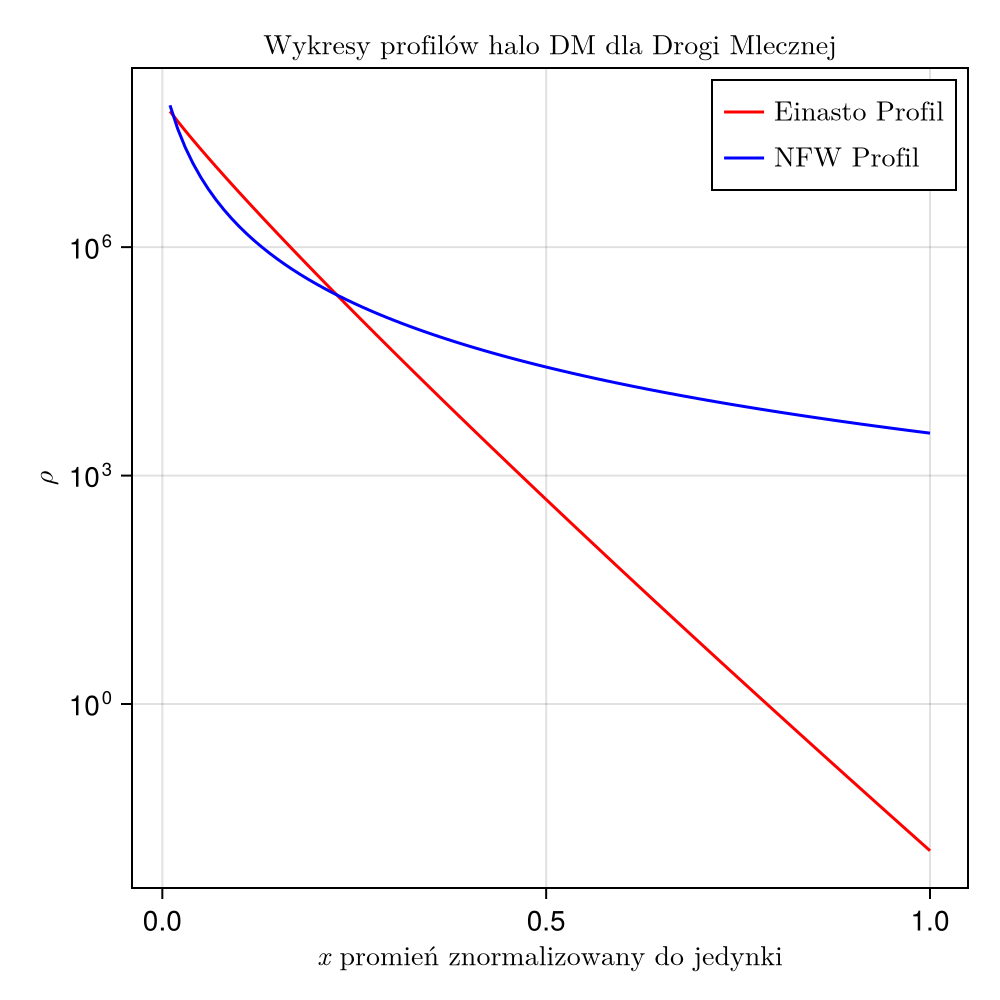

In [205]:
Fig

In [208]:
save("Prfoile_DM.pdf",Fig)

CairoMakie.Screen{PDF}


# Liczymy częśtość zdarzeń PBH z Ziemią

$$
\Gamma = \rho(R_z)\frac{G^2 (e^2 -1)}{v^3} f_{PBH} \frac{(M_z + m)^2f(m)}{m}
$$

In [11]:
xZ_NFW = 8/MilkyWay_NFW.Virial_Radius
xZ_Ein = 8/MilkyWay_Einasto.Virial_Radius

0.06702974444909929

In [298]:
ρZ1_Ein = Einasto_Profile(xZ_Ein,MilkyWay_Einasto)*(4.9*10.0^(-9))^3 # zaminiamy na au
ρZ1_NFW = Einasto_Profile(xZ_NFW,MilkyWay_NFW)*(4.9*10.0^(-9))^3 # zaminiamu na au

7.514635143101983e-18

In [300]:
function Earth_collision1(e::Float64,v::Float64,ρ::Float64,μ::Float64,σ::Float64,fpbh::Float64)
     G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s
    y = e^2 - 1.0
    time = 60.0*60.0*24.0*365.0 
    MZ = 10.0^(-5) #M_Sun
    I = μ^(-1)*MZ^2*exp(σ^2/2) + 2*MZ + μ*exp(σ^2/2)
    return G^2*y*fpbh*vrel^(-3)*I*time*ρ
end

function Earth_collision2(e::Float64,v::Float64,ρ::Float64,m::Float64,fpbh::Float64)
     G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s
    y = e^2 - 1.0
    time = 60.0*60.0*24.0*365.0 
    MZ = 10.0^(-5) #M_Sun
    I = m^(-1)*(MZ + m)^2 
    return G^2*y*fpbh*vrel^(-3)*I*time*ρ
end

function Earth_collision3(e::Float64,v::Float64,ρ::Float64,M_max::Float64,M_min::Float64,γ::Float64,fpbh::Float64)
     G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s
    y = e^2 - 1.0
    time = 60.0*60.0*24.0*365.0 
    MZ = 10.0^(-5) #M_Sun
    if γ == 0
        A = 1/log(M_max/M_min)
    else
        A = γ/(M_max^γ - M_min^γ)
    end
    I = A*MZ^2*(M_max^(γ-1) - M_min^(γ-1))/(γ - 1)  + 2.0*MZ + A*MZ*(M_max^(γ+1) - M_min^(γ+1))/(γ + 1)
    return G^2*y*fpbh*vrel^(-3)*I*time*ρ
end

Earth_collision3 (generic function with 1 method)

In [301]:
M_range = [10.0^(-15),10.0^(-14), 10.0^(-13),10.0^(-12),10.0^(-11),10.0^(-10),10.0^(-9),10.0^(-8),10.0^(-7),10.0^(-6),10.0^(-5),10.0^(-4),10.0^(-3),10.0^(-2),10.0^(-1),1.0]
σ_range = 0.1:0.1:2.0

0.1:0.1:2.0

In [302]:
V1

16-element Vector{Float64}:
 3303.0765467904635
  330.30765475951046
   33.030765556415155
    3.303076636105652
    0.33030774407499636
    0.03303085487487367
    0.003303165984291825
    0.0003303973895377607
    3.3123473103557294e-5
    3.4255118721680703e-6
    7.500198693402118e-7
    3.42551187216807e-6
    3.312347310355729e-5
    0.0003303973895377607
    0.003303165984291824
    0.033030854874873665

In [303]:
V1 = Earth_collision1.(1.1, 200.0, ρZ1_Ein, M_range, 2.0, 1.0)
V2 = Earth_collision1.(1.1, 200.0, ρZ1_Ein, M_range, 1.0, 1.0)
V3 = Earth_collision1.(1.1, 200.0, ρZ1_Ein, M_range, 0.5, 1.0)
V4 = Earth_collision1.(1.1, 200.0, ρZ1_Ein, M_range, 0.1, 1.0)
W1 = Earth_collision2.(1.1, 200.0, ρZ1_Ein, M_range, 1.0) # monochroamtic

16-element Vector{Float64}:
 6.477209556896157e-16
 6.477209568555134e-17
 6.477209685144907e-18
 6.477210851042691e-19
 6.477222510026304e-20
 6.477339100439549e-21
 6.47850506228393e-22
 6.490170451921472e-23
 6.607401467668291e-24
 7.837423562276867e-25
 2.590883822240286e-25
 7.837423562276865e-25
 6.607401467668289e-24
 6.490170451921472e-23
 6.478505062283929e-22
 6.477339100439548e-21

In [304]:
Q1 = Earth_collision3.(1.1, 200.0, ρZ1_Ein, M_range, 10.0^(-15),-0.5, 1.0)
Q2 = Earth_collision3.(1.1, 200.0, ρZ1_Ein, M_range, 10.0^(-15),0.0, 1.0)
Q3 = Earth_collision3.(1.1, 200.0, ρZ1_Ein, M_range, 10.0^(-15),0.5, 1.0)

16-element Vector{Float64}:
 NaN
   2.048273509085972e-16
   6.477209568555133e-17
   2.0482735207449488e-17
   6.477209685144905e-18
   2.0482736373347205e-18
   6.477210851042627e-19
   2.0482748032324423e-19
   6.477222510020041e-20
   2.0482864622118e-20
   6.4773391000077355e-21
   2.048403054140718e-21
   6.478505213419035e-22
   2.0495711087721844e-22
   6.490379881718695e-23
   2.0633869968218742e-23

In [305]:
Fig = Figure(size = (1000,1000))
Ax1 = Axis(Fig[1,1] , title = L"\text{Rozkład log-norm}\,\, +\,\, \text{monochromatyczny}", xlabel = L"\mu [M_{\odot}]" , ylabel = L"\text{Liczba kolizji} \left[\frac{1}{yr}\right]", xscale = log10, yscale = log10)
scatter!(M_range, V1 , label = L"\sigma = 2.0", color = :red)
scatter!(M_range, V2 , label = L"\sigma = 1.0", color = :blue)
scatter!(M_range, V3 , label = L"\sigma = 0.5", color = :green)
scatter!(M_range, V4 , label = L"\sigma = 0.1", color = 2)
scatter!(M_range, W1 , label = L"\text{rozkład monochromatyczne}", color = :black)
axislegend(Ax1)
Ax2 = Axis(Fig[2,1] , title = L"\text{Rozkład potęgowy}", xlabel = L"M_{max}[M_{\odot}]" , ylabel = L"\text{Liczba kolizji} \left[\frac{1}{yr}\right]" , xscale = log10, yscale = log10)
scatter!(M_range, Q1 , label = L"\gamma = -0.5", color = HSV.(250,100,50))
scatter!(M_range, Q2 , label = L"\gamma = 0.0", color = HSV.(340,100,1))
scatter!(M_range, Q3 , label = L"\gamma = 0.5", color = HSV.(200,100,1))
axislegend(Ax2, position = :lb)

Legend()

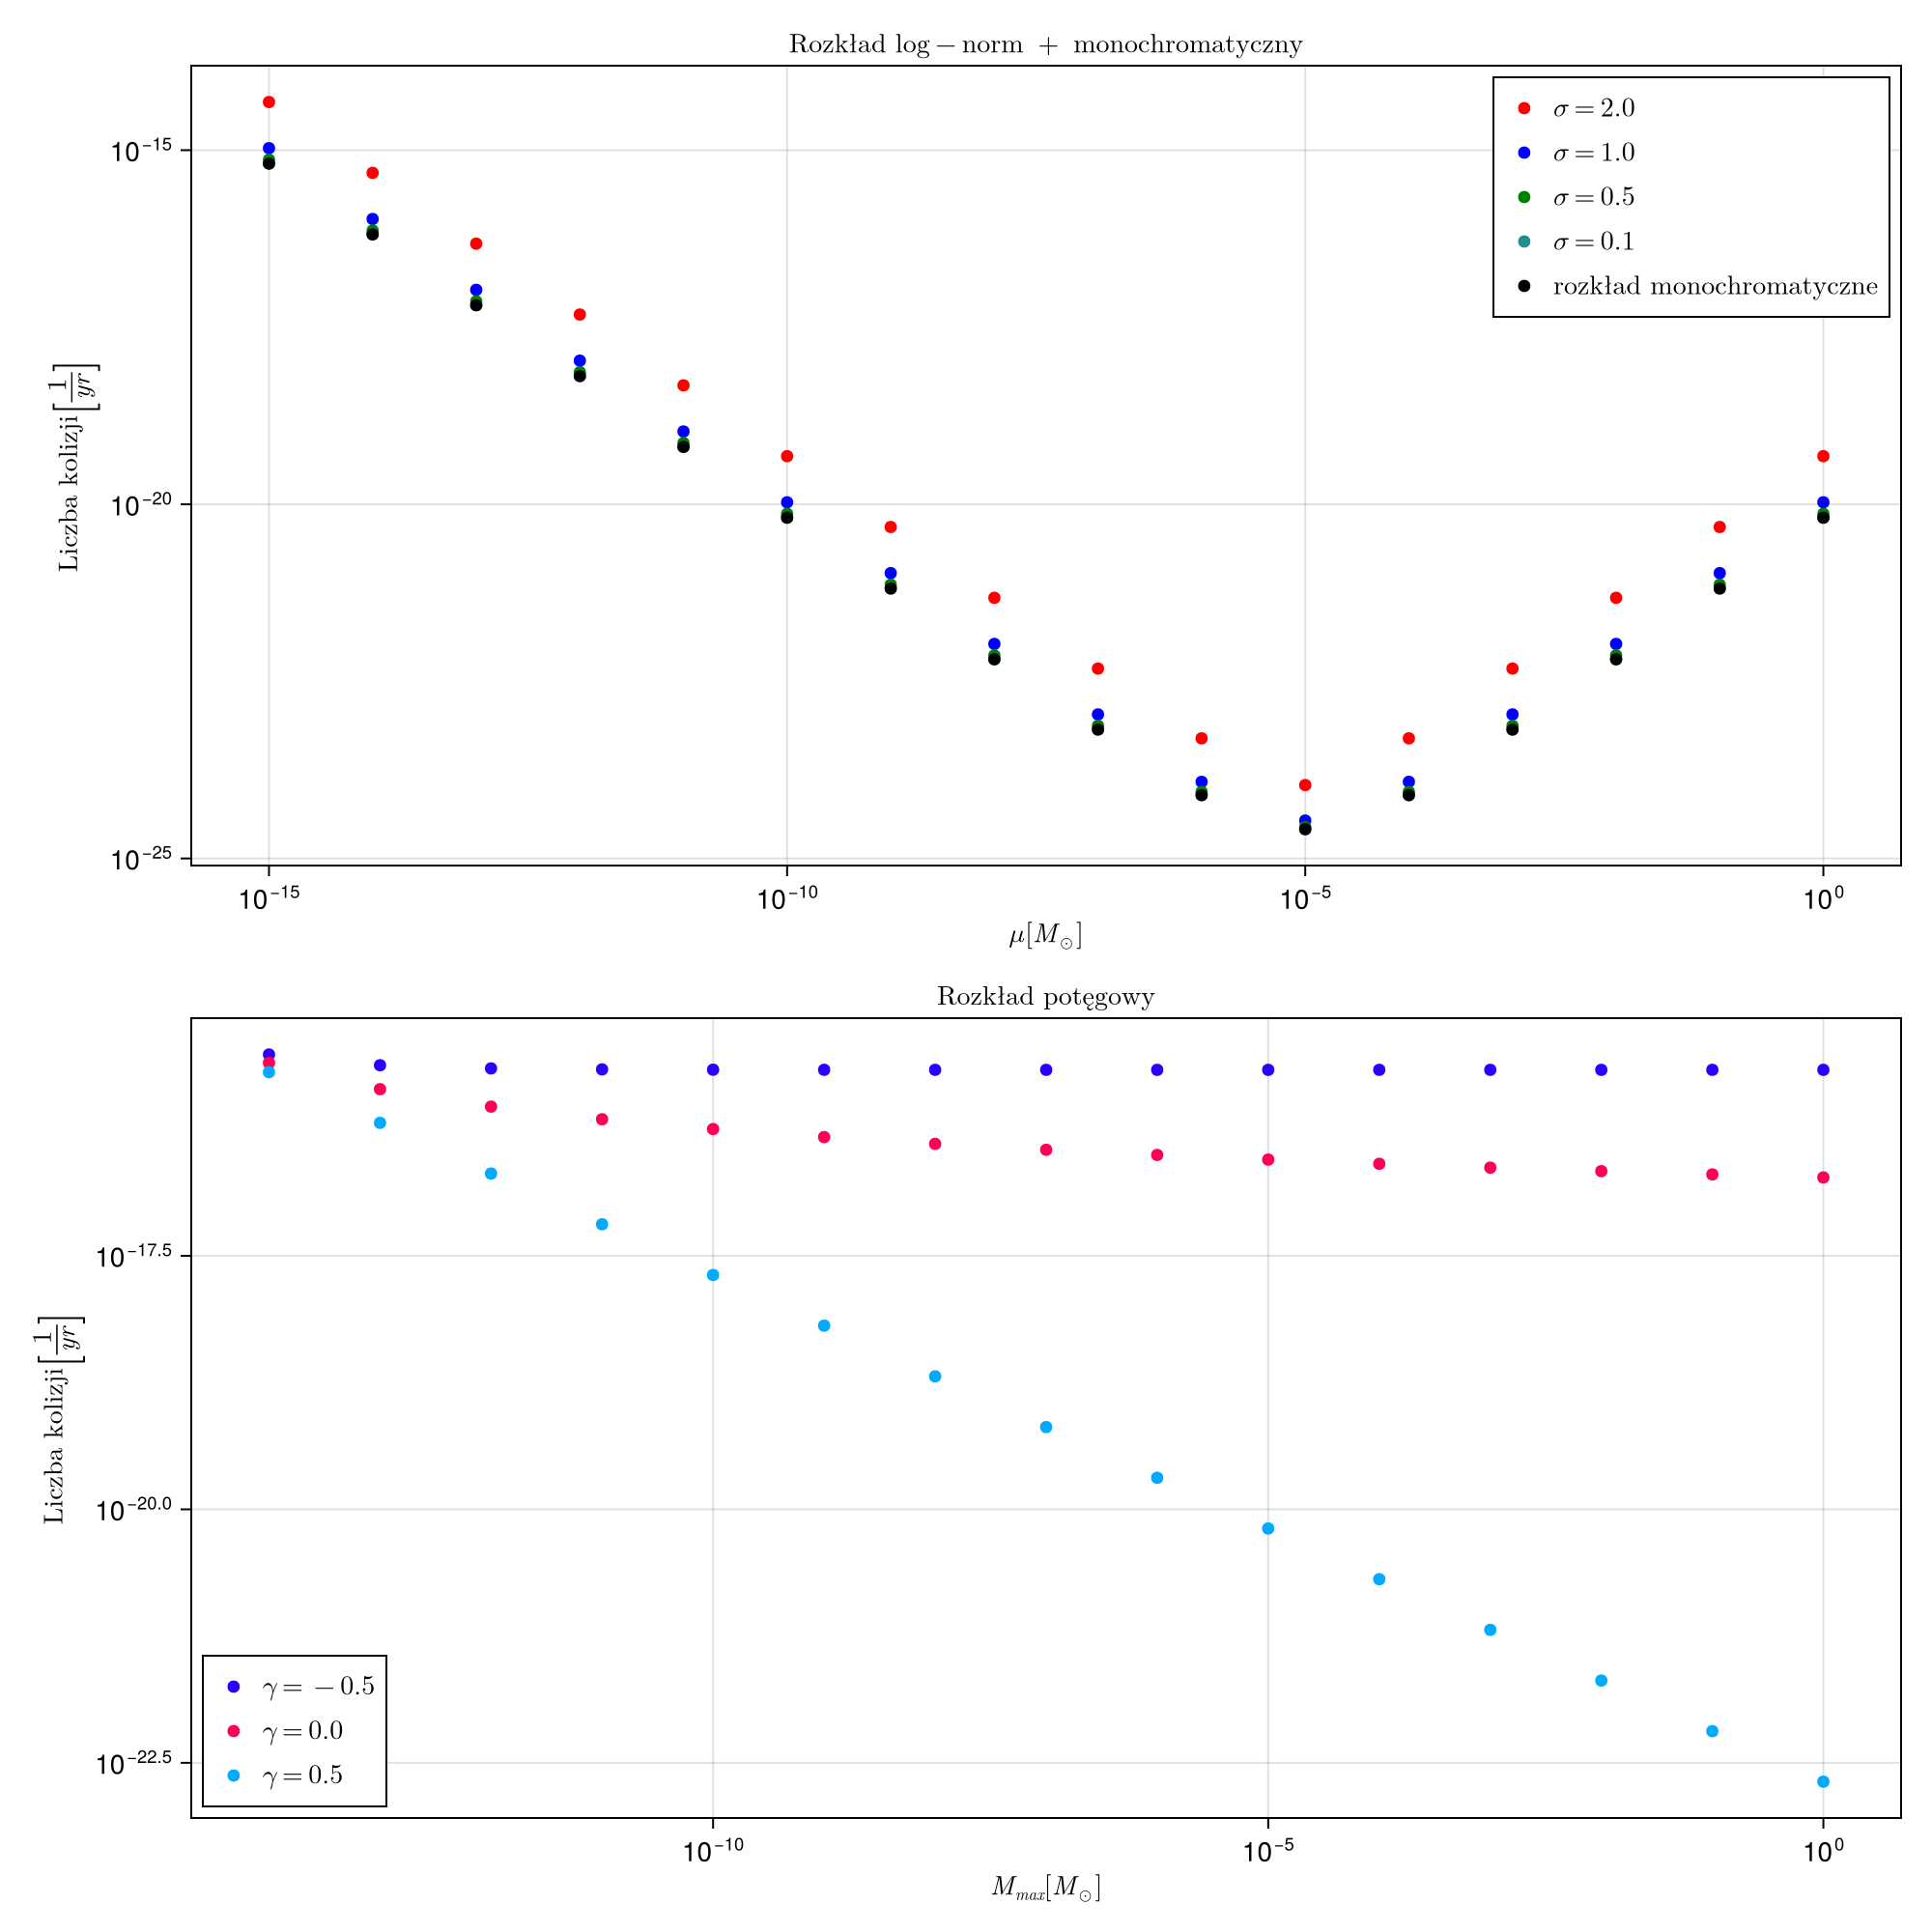

In [306]:
Fig

In [320]:
save("Collision_with_Earth.pdf",Fig)

CairoMakie.Screen{PDF}


# Liczba Zderzeń w Milky Way

In [214]:
function Square_Dense_Einasto(s::DM_Halo)
    M0 = s.Norm_Mass
    rs = s.Scale_Radius
    α = s.Slope
    C = Cusp_Scale(s)
    params = [α, C]
    f(x,p) = exp(-2.0*(p[2]*x)^p[1])*x^2
    IntProb = IntegralProblem(f, (0.0, 1.0), params)
    sol = solve(IntProb, QuadGKJL(), reltol =1e-3, abstol = 1e-3)
    Amplitude = (M0^2*C^3)/(4.0*pi*rs^3)
    return Amplitude*sol.u
end

function Square_Dense_NFW(s::DM_Halo)
    M0 = s.Norm_Mass
    rs = s.Scale_Radius
    β = s.Slope
    C = Cusp_Scale(s)
    params = [β ,C]
    g(x,p) = x^(2.0 - 2.0*p[1])/(1 + p[2]*x)^(6.0 - 2.0*p[1])
    IntProb = IntegralProblem(g, (0.0, 1.0), params)
    sol = solve(IntProb, QuadGKJL(), reltol =1e-3, abstol = 1e-3)
    Amplitude = (M0^2*C^(3.0 - 2.0*β))/(4.0*pi*rs^3)
    return Amplitude*sol.u
end

Square_Dense_NFW (generic function with 1 method)

In [307]:
s1 = Square_Dense_Einasto(MilkyWay_Einasto)*(4.9*10^(-9))^3 # M_sum^2/ kpc^3 (*4.9 x 10^(-9) au)
s2 = Square_Dense_NFW(MilkyWay_NFW)*(4.9*10^(-9))^3

2.2539234380447707e-7

In [308]:
one_year = 60.0*60.0*24.0*365

3.1536e7

In [309]:
(4.0*10.0^(-14))^2*(200.0*(1.5*10.0^8)^(-1))^(-3)*(1.1^2-1.0)*one_year

0.004470228000000003

In [311]:
function Event_Rate1(v::Float64, σ::Float64,e::Float64, fpbh::Float64, I::Float64) 
    G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s
    A = 2.0*(1 + exp(σ^2/2))
    return G^2*(e^2 -1)*fpbh^2*vrel^(-3)*I*A*one_year
end
function Event_Rate2(v::Float64, e::Float64, fpbh::Float64, I::Float64) 
    G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s

    return G^2*(e^2 -1)*fpbh^2*vrel^(-3)*I*4*one_year
end
function Event_Rate3(v::Float64, e::Float64,M_max, M_min, γ, fpbh::Float64, I::Float64) 
    G = 4.0*10.0^(-14) # au^3/M/s^2
    vrel= v*(1.5*10.0^8)^(-1) #au /s
    if γ == 0.0
        A = 2.0*(1.0  + M_max*M_min^(-1)/log(M_max/M_min)^2)
    else
        A = 2.0*(1.0 + γ^2/((γ+1.0)*(γ - 1.0))*(M_max^(γ - 1.0) - M_min^(γ - 1.0))*( M_max^(γ+1.0) - M_min^(γ+1.0) )/(M_max^γ - M_min^γ)^2)
    end
    
    return G^2*(e^2 -1)*fpbh^2*vrel^(-3)*I*A*one_year
end

Event_Rate3 (generic function with 1 method)

In [312]:
Event_Rate1(300.0, 0.5, 1.1, 0.1, s1)

1.0582314767789428e-11

In [313]:
ER1 = Event_Rate1.(300.0, σ_range, 1.1, 0.1, s1)

20-element Vector{Float64}:
 9.94664650675789e-12
 1.0021996567438805e-11
 1.0150119090910886e-11
 1.0334957921051356e-11
 1.0582314767789428e-11
 1.090015358114359e-11
 1.1299028730751422e-11
 1.1792669286232093e-11
 1.2398764707397134e-11
 1.3140014788183074e-11
 1.4045530688852508e-11
 1.5152707082225132e-11
 1.6509731764505047e-11
 1.8178964220298914e-11
 2.0241506845907202e-11
 2.2803423915557878e-11
 2.600425172555938e-11
 3.002871504589573e-11
 3.5122959354979855e-11
 4.161718426858436e-11

In [314]:
ER2 = Event_Rate2(300.0, 1.1, 0.1, s1)*ones(length(ER1))

20-element Vector{Float64}:
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12
 9.921779942296318e-12

In [315]:
ER31 = Event_Rate3.(300.0, 1.1, M_range, 10.0^(-15),0.5, 1.0, s1)
ER32 = Event_Rate3.(300.0, 1.1, M_range, 10.0^(-15),0.0, 1.0, s1)
ER33 = Event_Rate3.(300.0, 1.1, M_range, 10.0^(-15),-0.5, 1.0, s1)

16-element Vector{Float64}:
 NaN
   1.2366680855979776e-9
   2.3316182864396338e-9
   5.895918410101583e-9
   1.719940552997066e-8
   5.2954346687588024e-8
   1.6602461639742404e-7
   5.235852219656973e-7
   1.6542914589151724e-6
   5.2298986339971154e-6
   1.6536961357476975e-5
   5.229303322023632e-5
   0.00016536366049043342
   0.0005229243791292209
   0.0016536306518347317
   0.005229237838223726

In [316]:
ER33

16-element Vector{Float64}:
 NaN
   1.2366680855979776e-9
   2.3316182864396338e-9
   5.895918410101583e-9
   1.719940552997066e-8
   5.2954346687588024e-8
   1.6602461639742404e-7
   5.235852219656973e-7
   1.6542914589151724e-6
   5.2298986339971154e-6
   1.6536961357476975e-5
   5.229303322023632e-5
   0.00016536366049043342
   0.0005229243791292209
   0.0016536306518347317
   0.005229237838223726

In [317]:
Fig = Figure(size = (1000,500))
Ax1 = Axis(Fig[1,1], title = L"\text{Częstość zderzeń PBHs w przypadku rozkładu log-normalnego} ", xlabel = L"\sigma", ylabel = L"\Gamma[1/s]", yscale = log10)
scatter!(σ_range, ER1,color = :red)
scatter!(σ_range, ER2, label = L"\text{Rozkład monochromatyczny}",color = :darkblue)
axislegend(Ax1, position = :lt)
Ax2 = Axis(Fig[1,2], title = L"\text{Częstość zderzeń w przypadku rozkładu potęgowego}", xlabel = L"M_{max}", ylabel = L"\Gamma[1/s]",xscale = log10, yscale = log10)
scatter!(M_range, ER31, label = L"\gamma = \pm 0.5",color = :red, strokecolor = :blue,     strokewidth = 2)
scatter!(M_range, ER32, label = L"\gamma = 0.0",color = :green)
#scatter!(M_range, ER33, label = L"\gamma = -0.5",color = :blue)
axislegend(Ax2, position = :lt)

Legend()

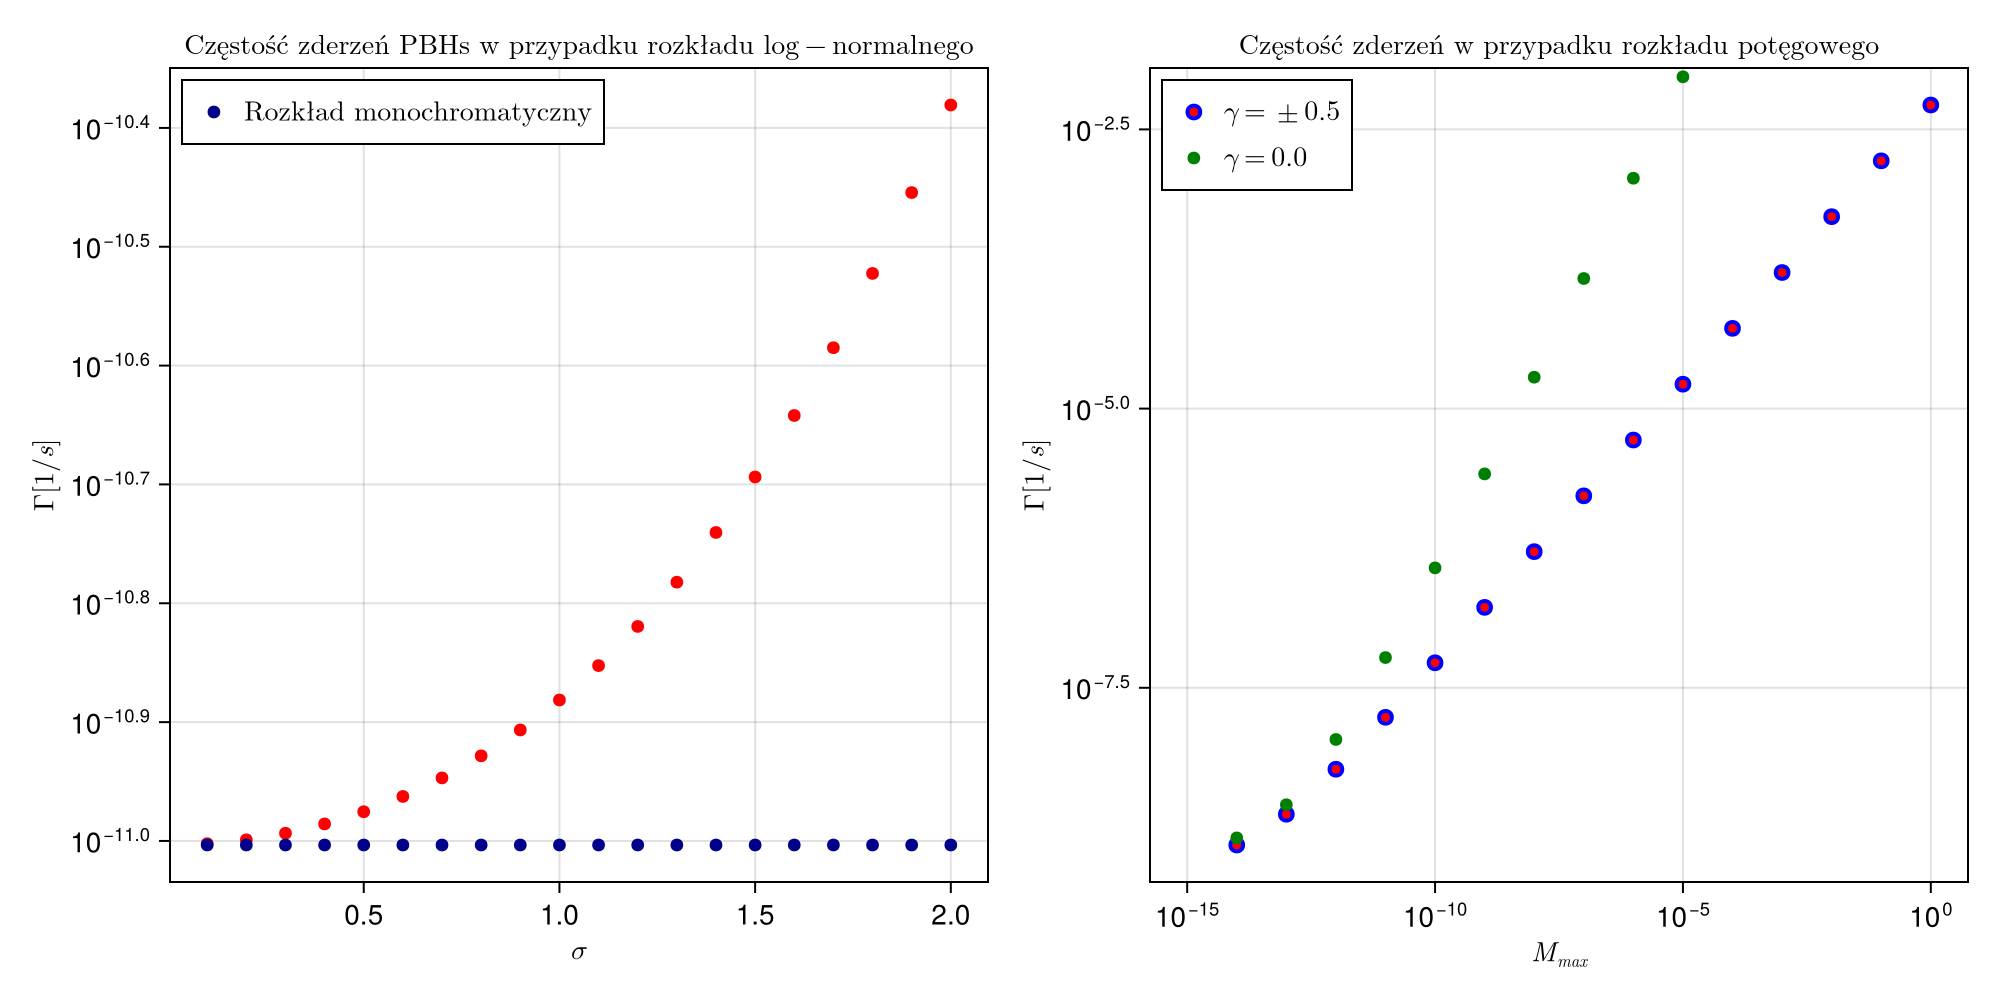

In [318]:
Fig

In [319]:
save("Zderzenia_All.pdf",Fig)

CairoMakie.Screen{PDF}


In [265]:
ER32

16-element Vector{Float64}:
 Inf
  3.8590346334875923e8
  7.641932616756425e8
  2.9358569187373805e9
  1.5895785194750977e10
  1.0101098981829971e11
  7.006703738327667e11
  5.146933687500972e12
  3.9405321035981484e13
  3.113497619628433e14
  2.5219321225561535e15
  2.084241326466802e16
  1.751341660257859e17
  1.4922674491549463e18
  1.286699994322498e19
  1.1208586617106209e20